In [1]:
import UWGeodynamics as GEO
import numpy as np

loaded rc file /opt/UWGeodynamics/UWGeodynamics/uwgeo-data/uwgeodynamicsrc


In [2]:
u = GEO.UnitRegistry

velocity = 1. * u.centimeter / u.year
model_length = 120. * u.kilometer
bodyforce = 2400. * u.kilogram / u.metre**3 * 9.81 * u.meter / u.second**2

KL = model_length
Kt = KL / velocity
KM = bodyforce * KL**2 * Kt**2

GEO.scaling["[length]"] = KL
GEO.scaling["[time]"] = Kt
GEO.scaling["[mass]"] = KM

In [3]:
Model = GEO.Model(
    elementRes=(480, 60),
    minCoord=(0. * u.kilometer, -6. * u.kilometer),
    maxCoord=(120. * u.kilometer, 9. * u.kilometer),
    gravity=(0.0, -9.81 * u.meter / u.second**2))
Model.outputDir = "lowresThrustWedge"

In [4]:
Model.minViscosity = 1e18 * u.pascal * u.second
Model.maxViscosity = 1e23 * u.pascal * u.second

In [5]:
stickyAirLayer = Model.add_material(
    name="Sticky Air",
    shape=GEO.shapes.Layer(top=Model.top, bottom=0. * u.kilometer))
plasticLayer = Model.add_material(
    name="Plastic",
    shape=GEO.shapes.Layer(top=stickyAirLayer.bottom, bottom=-5 * u.kilometer))
frictLayer = Model.add_material(
    name="Decol",
    shape=GEO.shapes.Layer(top=plasticLayer.bottom, bottom=-5.5 * u.kilometer))
rigidBase = Model.add_material(
    name="Ridid Base Layer",
    shape=GEO.shapes.Layer(top=frictLayer.bottom, bottom=Model.bottom))


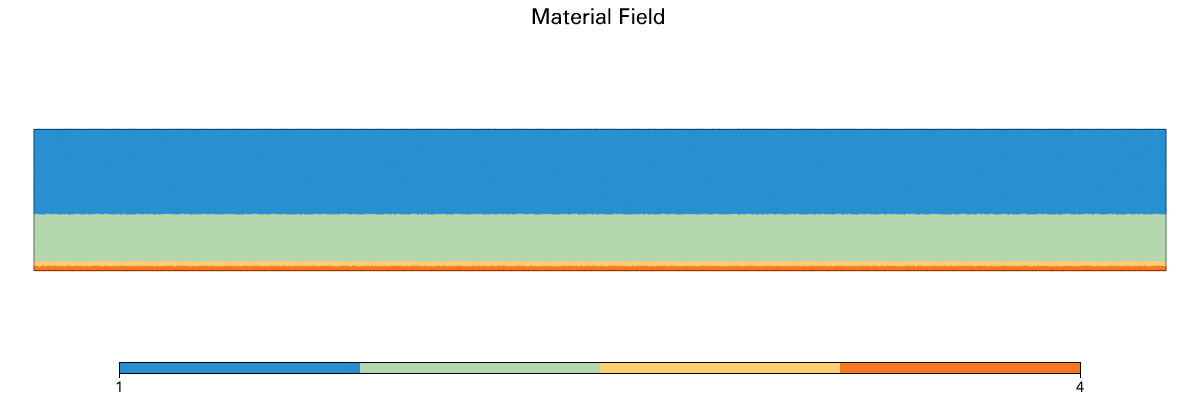

'Materials_initial.png'

In [6]:
Model.plot.material(figsize=(1200, 400), fn_size=2).save("Materials_initial")

In [7]:
stickyAirLayer.density = 1. * u.kilogram / u.metre**3
plasticLayer.density = 2400. * u.kilogram / u.metre**3
frictLayer.density = 2400. * u.kilogram / u.metre**3
rigidBase.density = 2400. * u.kilogram / u.metre**3

In [8]:
stickyAirLayer.viscosity = GEO.ConstantViscosity(1e18 * u.pascal * u.second)
rigidBase.viscosity = GEO.ConstantViscosity(1e23 * u.pascal * u.second)

plasticLayer.minViscosity = 1e18 * u.pascal * u.second
frictLayer.minViscosity = 1e18 * u.pascal * u.second

In [9]:
plasticLayer.plasticity = GEO.DruckerPrager(
    cohesion=20 * u.megapascal,
    # cohesionAfterSoftening=3 * u.megapascal,
    frictionCoefficient=np.tan(np.radians(30.0)),
    # frictionAfterSoftening=np.tan(np.radians(15.0))
)

frictLayer.plasticity = GEO.DruckerPrager(
    cohesion=0.1 * u.megapascal,
    # cohesionAfterSoftening=0.01 * u.megapascal,
    frictionCoefficient=np.tan(np.radians(10.0)),
    # frictionAfterSoftening=np.tan(np.radians(10.0))
)


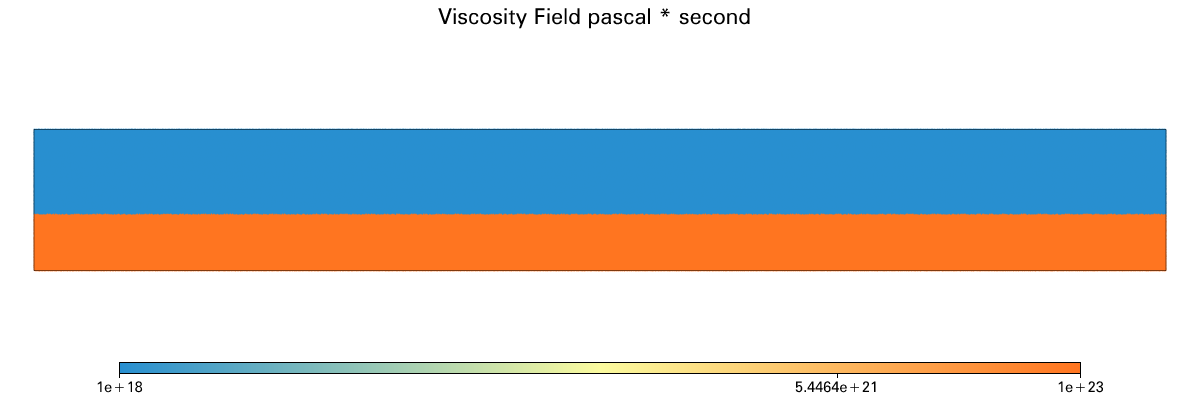

'Viscosity_initial.png'

In [10]:
Model.plot.viscosity(figsize=(1200, 400), fn_size=2).save("Viscosity_initial")

In [11]:
conditions = [(Model.y <= GEO.nd(rigidBase.top), GEO.nd(-velocity)),
              (True, GEO.nd(0. * u.centimeter / u.year))]

VelocityBcs = Model.set_velocityBCs(
    left=[conditions, 0.],
    right=[-velocity, None],
    top=[None, None],
    bottom=[-velocity, 0.])


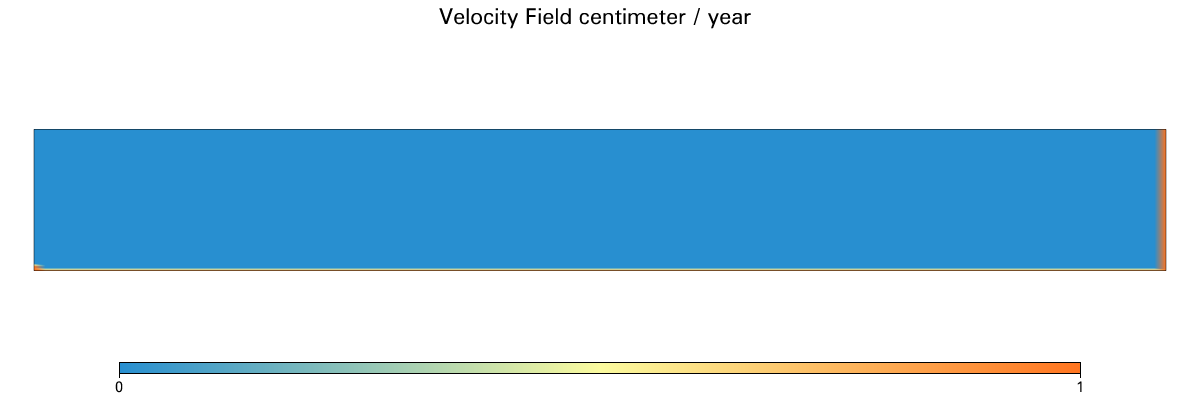

In [12]:
Fig = Model.plot.velocityField(figsize=(1200, 400)).save("Velocity_initial")

In [13]:
GEO.rcParams["solver"] = "mumps"
GEO.rcParams["penalty"] = 1e6

In [14]:
Model.init_model()

In [15]:
Model.surfaceProcesses = GEO.surfaceProcesses.Badlands(
    airIndex=[stickyAirLayer.index],
    sedimentIndex=[plasticLayer.index],
    resolution=GEO.nd(2*Model.length / Model.elementRes[0]),
    XML='./surf.xml',
    checkpoint_interval=.1 * u.megayears,
    Model=Model)

In [16]:
Model.run_for(4 * u.megayears, .1 * u.megayears)

Processing surface with Badlands
   - Writing outputs (0.30 seconds; tNow = 0.0)
tNow = 5821.0 (0.07 seconds)
   - Writing outputs (0.21 seconds; tNow = 5821.0)
Processing surface with Badlands...Done
Time:  0.00581194023374 megayear dt: 0.00581194023374 megayear
Processing surface with Badlands
tNow = 11621.0 (0.07 seconds)
   - Writing outputs (0.32 seconds; tNow = 11621.0)
Processing surface with Badlands...Done
Time:  0.0116119094354 megayear dt: 0.00579996920164 megayear
Processing surface with Badlands
tNow = 17418.0 (0.07 seconds)
   - Writing outputs (0.30 seconds; tNow = 17418.0)
Processing surface with Badlands...Done
Time:  0.0174081374588 megayear dt: 0.00579622802339 megayear
Processing surface with Badlands
tNow = 23212.0 (0.07 seconds)
   - Writing outputs (0.30 seconds; tNow = 23212.0)
Processing surface with Badlands...Done
Time:  0.0232023372051 megayear dt: 0.0057941997463 megayear
Processing surface with Badlands
tNow = 29005.0 (0.07 seconds)
   - Writing outputs (0

Processing surface with Badlands
tNow = 198452.0 (0.07 seconds)
   - Writing outputs (0.31 seconds; tNow = 198452.0)
Processing surface with Badlands...Done
Time:  0.198442732303 megayear dt: 0.00579185429096 megayear
Processing surface with Badlands
tNow = 200009.0 (0.07 seconds)
   - Writing outputs (0.31 seconds; tNow = 200009.0)
Processing surface with Badlands...Done
Time:  0.2 megayear dt: 0.00155726769667 megayear
Processing surface with Badlands
tNow = 205801.0 (0.07 seconds)
   - Writing outputs (0.32 seconds; tNow = 205801.0)
Processing surface with Badlands...Done
Time:  0.205791911726 megayear dt: 0.00579191172618 megayear
Processing surface with Badlands
tNow = 211592.0 (0.07 seconds)
   - Writing outputs (0.31 seconds; tNow = 211592.0)
Processing surface with Badlands...Done
Time:  0.211582656968 megayear dt: 0.00579074524149 megayear
Processing surface with Badlands
tNow = 217384.0 (0.07 seconds)
   - Writing outputs (0.31 seconds; tNow = 217384.0)
Processing surface wit

Processing surface with Badlands
tNow = 386906.0 (0.07 seconds)
   - Writing outputs (0.32 seconds; tNow = 386906.0)
Processing surface with Badlands...Done
Time:  0.386896432578 megayear dt: 0.00579235793487 megayear
Processing surface with Badlands
tNow = 392699.0 (0.08 seconds)
   - Writing outputs (0.32 seconds; tNow = 392699.0)
Processing surface with Badlands...Done
Time:  0.39268924645 megayear dt: 0.00579281387289 megayear
Processing surface with Badlands
tNow = 398493.0 (0.06 seconds)
   - Writing outputs (0.33 seconds; tNow = 398493.0)
Processing surface with Badlands...Done
Time:  0.398483587278 megayear dt: 0.00579434082717 megayear
Processing surface with Badlands
tNow = 400009.0 (0.06 seconds)
   - Writing outputs (0.31 seconds; tNow = 400009.0)
Processing surface with Badlands...Done
Time:  0.4 megayear dt: 0.00151641272235 megayear
Processing surface with Badlands
tNow = 405804.0 (0.07 seconds)
   - Writing outputs (0.33 seconds; tNow = 405804.0)
Processing surface with

tNow = 575342.0 (0.07 seconds)
   - Writing outputs (0.32 seconds; tNow = 575342.0)
Processing surface with Badlands...Done
Time:  0.575332925813 megayear dt: 0.00579506138156 megayear
Processing surface with Badlands
tNow = 581138.0 (0.07 seconds)
   - Writing outputs (0.32 seconds; tNow = 581138.0)
Processing surface with Badlands...Done
Time:  0.581128732102 megayear dt: 0.00579580628983 megayear
Processing surface with Badlands
tNow = 586934.0 (0.06 seconds)
   - Writing outputs (0.32 seconds; tNow = 586934.0)
Processing surface with Badlands...Done
Time:  0.586924574893 megayear dt: 0.0057958427904 megayear
Processing surface with Badlands
tNow = 592730.0 (0.07 seconds)
   - Writing outputs (0.32 seconds; tNow = 592730.0)
Processing surface with Badlands...Done
Time:  0.592720250432 megayear dt: 0.00579567553915 megayear
Processing surface with Badlands
tNow = 598525.0 (0.07 seconds)
   - Writing outputs (0.34 seconds; tNow = 598525.0)
Processing surface with Badlands...Done
Time:

tNow = 763825.0 (0.06 seconds)
   - Writing outputs (0.32 seconds; tNow = 763825.0)
Processing surface with Badlands...Done
Time:  0.763815284782 megayear dt: 0.00580193033124 megayear
Processing surface with Badlands
tNow = 769626.0 (0.06 seconds)
   - Writing outputs (0.32 seconds; tNow = 769626.0)
Processing surface with Badlands...Done
Time:  0.769616952219 megayear dt: 0.00580166743634 megayear
Processing surface with Badlands
tNow = 775431.0 (0.07 seconds)
   - Writing outputs (0.33 seconds; tNow = 775431.0)
Processing surface with Badlands...Done
Time:  0.775421562865 megayear dt: 0.00580461064625 megayear
Processing surface with Badlands
tNow = 781234.0 (0.07 seconds)
   - Writing outputs (0.33 seconds; tNow = 781234.0)
Processing surface with Badlands...Done
Time:  0.781224120959 megayear dt: 0.00580255809446 megayear
Processing surface with Badlands
tNow = 787038.0 (0.07 seconds)
   - Writing outputs (0.33 seconds; tNow = 787038.0)
Processing surface with Badlands...Done
Time

tNow = 952317.0 (0.07 seconds)
   - Writing outputs (0.34 seconds; tNow = 952317.0)
Processing surface with Badlands...Done
Time:  0.952307932953 megayear dt: 0.00581325707164 megayear
Processing surface with Badlands
tNow = 958132.0 (0.07 seconds)
   - Writing outputs (0.33 seconds; tNow = 958132.0)
Processing surface with Badlands...Done
Time:  0.958122162136 megayear dt: 0.00581422918282 megayear
Processing surface with Badlands
tNow = 963944.0 (0.06 seconds)
   - Writing outputs (0.33 seconds; tNow = 963944.0)
Processing surface with Badlands...Done
Time:  0.963934233342 megayear dt: 0.00581207120626 megayear
Processing surface with Badlands
tNow = 969755.0 (0.07 seconds)
   - Writing outputs (0.33 seconds; tNow = 969755.0)
Processing surface with Badlands...Done
Time:  0.969745441623 megayear dt: 0.00581120828077 megayear
Processing surface with Badlands
tNow = 975572.0 (0.07 seconds)
   - Writing outputs (0.33 seconds; tNow = 975572.0)
Processing surface with Badlands...Done
Time

tNow = 1140703.0 (0.07 seconds)
   - Writing outputs (0.33 seconds; tNow = 1140703.0)
Processing surface with Badlands...Done
Time:  1.14069396911 megayear dt: 0.00581200401423 megayear
Processing surface with Badlands
tNow = 1146518.0 (0.07 seconds)
   - Writing outputs (0.33 seconds; tNow = 1146518.0)
Processing surface with Badlands...Done
Time:  1.14650809159 megayear dt: 0.00581412248025 megayear
Processing surface with Badlands
tNow = 1152331.0 (0.07 seconds)
   - Writing outputs (0.33 seconds; tNow = 1152331.0)
Processing surface with Badlands...Done
Time:  1.1523219671 megayear dt: 0.00581387551056 megayear
Processing surface with Badlands
tNow = 1158148.0 (0.07 seconds)
   - Writing outputs (0.34 seconds; tNow = 1158148.0)
Processing surface with Badlands...Done
Time:  1.15813864227 megayear dt: 0.00581667516929 megayear
Processing surface with Badlands
tNow = 1163960.0 (0.07 seconds)
   - Writing outputs (0.34 seconds; tNow = 1163960.0)
Processing surface with Badlands...Done

tNow = 1329101.0 (0.06 seconds)
   - Writing outputs (0.34 seconds; tNow = 1329101.0)
Processing surface with Badlands...Done
Time:  1.3290915627 megayear dt: 0.00581803000063 megayear
Processing surface with Badlands
tNow = 1334919.0 (0.06 seconds)
   - Writing outputs (0.33 seconds; tNow = 1334919.0)
Processing surface with Badlands...Done
Time:  1.33490959361 megayear dt: 0.00581803090393 megayear
Processing surface with Badlands
tNow = 1340741.0 (0.07 seconds)
   - Writing outputs (0.34 seconds; tNow = 1340741.0)
Processing surface with Badlands...Done
Time:  1.34073156404 megayear dt: 0.00582197042763 megayear
Processing surface with Badlands
tNow = 1346557.0 (0.06 seconds)
   - Writing outputs (0.33 seconds; tNow = 1346557.0)
Processing surface with Badlands...Done
Time:  1.34654768674 megayear dt: 0.00581612270832 megayear
Processing surface with Badlands
tNow = 1352380.0 (0.08 seconds)
   - Writing outputs (0.34 seconds; tNow = 1352380.0)
Processing surface with Badlands...Done

tNow = 1517491.0 (0.06 seconds)
   - Writing outputs (0.34 seconds; tNow = 1517491.0)
Processing surface with Badlands...Done
Time:  1.51748183828 megayear dt: 0.00582683475424 megayear
Processing surface with Badlands
tNow = 1523320.0 (0.06 seconds)
   - Writing outputs (0.35 seconds; tNow = 1523320.0)
Processing surface with Badlands...Done
Time:  1.52331051554 megayear dt: 0.00582867725469 megayear
Processing surface with Badlands
tNow = 1529148.0 (0.06 seconds)
   - Writing outputs (0.34 seconds; tNow = 1529148.0)
Processing surface with Badlands...Done
Time:  1.52913846932 megayear dt: 0.00582795378578 megayear
Processing surface with Badlands
tNow = 1534978.0 (0.07 seconds)
   - Writing outputs (0.34 seconds; tNow = 1534978.0)
Processing surface with Badlands...Done
Time:  1.5349683818 megayear dt: 0.0058299124749 megayear
Processing surface with Badlands
tNow = 1540808.0 (0.07 seconds)
   - Writing outputs (0.35 seconds; tNow = 1540808.0)
Processing surface with Badlands...Done


Processing surface with Badlands
tNow = 1705850.0 (0.07 seconds)
   - Writing outputs (0.34 seconds; tNow = 1705850.0)
Processing surface with Badlands...Done
Time:  1.70584000996 megayear dt: 0.0058400099598 megayear
Processing surface with Badlands
tNow = 1711689.0 (0.06 seconds)
   - Writing outputs (0.35 seconds; tNow = 1711689.0)
Processing surface with Badlands...Done
Time:  1.71167941448 megayear dt: 0.00583940451822 megayear
Processing surface with Badlands
tNow = 1717530.0 (0.07 seconds)
   - Writing outputs (0.35 seconds; tNow = 1717530.0)
Processing surface with Badlands...Done
Time:  1.71752064289 megayear dt: 0.00584122841267 megayear
Processing surface with Badlands
tNow = 1723372.0 (0.06 seconds)
   - Writing outputs (0.35 seconds; tNow = 1723372.0)
Processing surface with Badlands...Done
Time:  1.72336271512 megayear dt: 0.00584207222508 megayear
Processing surface with Badlands
tNow = 1729214.0 (0.06 seconds)
   - Writing outputs (0.37 seconds; tNow = 1729214.0)
Proces

Processing surface with Badlands
tNow = 1899516.0 (0.06 seconds)
   - Writing outputs (0.35 seconds; tNow = 1899516.0)
Processing surface with Badlands...Done
Time:  1.89950656032 megayear dt: 0.00585587767175 megayear
Processing surface with Badlands
tNow = 1900009.0 (0.06 seconds)
   - Writing outputs (0.35 seconds; tNow = 1900009.0)
Processing surface with Badlands...Done
Time:  1.9 megayear dt: 0.000493439683191 megayear
Processing surface with Badlands
tNow = 1905865.0 (0.09 seconds)
   - Writing outputs (0.38 seconds; tNow = 1905865.0)
Processing surface with Badlands...Done
Time:  1.90585574464 megayear dt: 0.00585574464102 megayear
Processing surface with Badlands
tNow = 1911720.0 (0.06 seconds)
   - Writing outputs (0.36 seconds; tNow = 1911720.0)
Processing surface with Badlands...Done
Time:  1.91171023081 megayear dt: 0.00585448616977 megayear
Processing surface with Badlands
tNow = 1917575.0 (0.06 seconds)
   - Writing outputs (0.35 seconds; tNow = 1917575.0)
Processing sur

Processing surface with Badlands
tNow = 2087939.0 (0.07 seconds)
   - Writing outputs (0.36 seconds; tNow = 2087939.0)
Processing surface with Badlands...Done
Time:  2.08792974425 megayear dt: 0.00586348715415 megayear
Processing surface with Badlands
tNow = 2093802.0 (0.06 seconds)
   - Writing outputs (0.36 seconds; tNow = 2093802.0)
Processing surface with Badlands...Done
Time:  2.09379279344 megayear dt: 0.005863049186 megayear
Processing surface with Badlands
tNow = 2099666.0 (0.06 seconds)
   - Writing outputs (0.36 seconds; tNow = 2099666.0)
Processing surface with Badlands...Done
Time:  2.09965638527 megayear dt: 0.00586359183748 megayear
Processing surface with Badlands
tNow = 2100009.0 (0.07 seconds)
   - Writing outputs (0.36 seconds; tNow = 2100009.0)
Processing surface with Badlands...Done
Time:  2.1 megayear dt: 0.000343614726289 megayear
Processing surface with Badlands
tNow = 2105874.0 (0.07 seconds)
   - Writing outputs (0.36 seconds; tNow = 2105874.0)
Processing surfa

Processing surface with Badlands
tNow = 2276273.0 (0.08 seconds)
   - Writing outputs (0.37 seconds; tNow = 2276273.0)
Processing surface with Badlands...Done
Time:  2.27626326993 megayear dt: 0.00586571855923 megayear
Processing surface with Badlands
tNow = 2282141.0 (0.06 seconds)
   - Writing outputs (0.36 seconds; tNow = 2282141.0)
Processing surface with Badlands...Done
Time:  2.28213107774 megayear dt: 0.0058678078054 megayear
Processing surface with Badlands
tNow = 2288010.0 (0.07 seconds)
   - Writing outputs (0.36 seconds; tNow = 2288010.0)
Processing surface with Badlands...Done
Time:  2.28800066081 megayear dt: 0.00586958306831 megayear
Processing surface with Badlands
tNow = 2293878.0 (0.06 seconds)
   - Writing outputs (0.37 seconds; tNow = 2293878.0)
Processing surface with Badlands...Done
Time:  2.293868054 megayear dt: 0.00586739319712 megayear
Processing surface with Badlands
tNow = 2299745.0 (0.07 seconds)
   - Writing outputs (0.37 seconds; tNow = 2299745.0)
Processi

Processing surface with Badlands
tNow = 2464443.0 (0.08 seconds)
   - Writing outputs (0.37 seconds; tNow = 2464443.0)
Processing surface with Badlands...Done
Time:  2.46443366601 megayear dt: 0.00585716801602 megayear
Processing surface with Badlands
tNow = 2470297.0 (0.07 seconds)
   - Writing outputs (0.36 seconds; tNow = 2470297.0)
Processing surface with Badlands...Done
Time:  2.47028771573 megayear dt: 0.00585404972422 megayear
Processing surface with Badlands
tNow = 2476155.0 (0.07 seconds)
   - Writing outputs (0.36 seconds; tNow = 2476155.0)
Processing surface with Badlands...Done
Time:  2.47614531536 megayear dt: 0.00585759963425 megayear
Processing surface with Badlands
tNow = 2482011.0 (0.07 seconds)
   - Writing outputs (0.36 seconds; tNow = 2482011.0)
Processing surface with Badlands...Done
Time:  2.48200141262 megayear dt: 0.00585609725079 megayear
Processing surface with Badlands
tNow = 2487868.0 (0.07 seconds)
   - Writing outputs (0.36 seconds; tNow = 2487868.0)
Proce

Processing surface with Badlands
tNow = 2652756.0 (0.07 seconds)
   - Writing outputs (0.37 seconds; tNow = 2652756.0)
Processing surface with Badlands...Done
Time:  2.6527465087 megayear dt: 0.00586359883589 megayear
Processing surface with Badlands
tNow = 2658618.0 (0.07 seconds)
   - Writing outputs (0.37 seconds; tNow = 2658618.0)
Processing surface with Badlands...Done
Time:  2.65860812164 megayear dt: 0.00586161293415 megayear
Processing surface with Badlands
tNow = 2664477.0 (0.07 seconds)
   - Writing outputs (0.38 seconds; tNow = 2664477.0)
Processing surface with Badlands...Done
Time:  2.66446731427 megayear dt: 0.00585919263119 megayear
Processing surface with Badlands
tNow = 2670335.0 (0.07 seconds)
   - Writing outputs (0.37 seconds; tNow = 2670335.0)
Processing surface with Badlands...Done
Time:  2.67032576807 megayear dt: 0.00585845380426 megayear
Processing surface with Badlands
tNow = 2676199.0 (0.07 seconds)
   - Writing outputs (0.38 seconds; tNow = 2676199.0)
Proces

Processing surface with Badlands
tNow = 2841036.0 (0.07 seconds)
   - Writing outputs (0.39 seconds; tNow = 2841036.0)
Processing surface with Badlands...Done
Time:  2.84102613956 megayear dt: 0.0058596973257 megayear
Processing surface with Badlands
tNow = 2846897.0 (0.07 seconds)
   - Writing outputs (0.37 seconds; tNow = 2846897.0)
Processing surface with Badlands...Done
Time:  2.84688700801 megayear dt: 0.00586086844448 megayear
Processing surface with Badlands
tNow = 2852758.0 (0.07 seconds)
   - Writing outputs (0.38 seconds; tNow = 2852758.0)
Processing surface with Badlands...Done
Time:  2.8527486442 megayear dt: 0.00586163619137 megayear
Processing surface with Badlands
tNow = 2858621.0 (0.07 seconds)
   - Writing outputs (0.40 seconds; tNow = 2858621.0)
Processing surface with Badlands...Done
Time:  2.85861106721 megayear dt: 0.00586242301009 megayear
Processing surface with Badlands
tNow = 2864484.0 (0.07 seconds)
   - Writing outputs (0.38 seconds; tNow = 2864484.0)
Process

Processing surface with Badlands
tNow = 3029381.0 (0.07 seconds)
   - Writing outputs (0.38 seconds; tNow = 3029381.0)
Processing surface with Badlands...Done
Time:  3.02937135377 megayear dt: 0.00588026505162 megayear
Processing surface with Badlands
tNow = 3035259.0 (0.07 seconds)
   - Writing outputs (0.37 seconds; tNow = 3035259.0)
Processing surface with Badlands...Done
Time:  3.03524944855 megayear dt: 0.00587809478208 megayear
Processing surface with Badlands
tNow = 3041138.0 (0.07 seconds)
   - Writing outputs (0.37 seconds; tNow = 3041138.0)
Processing surface with Badlands...Done
Time:  3.04112853265 megayear dt: 0.00587908410121 megayear
Processing surface with Badlands
tNow = 3047020.0 (0.07 seconds)
   - Writing outputs (0.39 seconds; tNow = 3047020.0)
Processing surface with Badlands...Done
Time:  3.0470107239 megayear dt: 0.00588219124723 megayear
Processing surface with Badlands
tNow = 3052903.0 (0.08 seconds)
   - Writing outputs (0.38 seconds; tNow = 3052903.0)
Proces

Processing surface with Badlands
tNow = 3229542.0 (0.07 seconds)
   - Writing outputs (0.38 seconds; tNow = 3229542.0)
Processing surface with Badlands...Done
Time:  3.2295320726 megayear dt: 0.00590723170728 megayear
Processing surface with Badlands
tNow = 3235448.0 (0.07 seconds)
   - Writing outputs (0.38 seconds; tNow = 3235448.0)
Processing surface with Badlands...Done
Time:  3.23543894225 megayear dt: 0.00590686965534 megayear
Processing surface with Badlands
tNow = 3241357.0 (0.07 seconds)
   - Writing outputs (0.39 seconds; tNow = 3241357.0)
Processing surface with Badlands...Done
Time:  3.24134755081 megayear dt: 0.00590860856134 megayear
Processing surface with Badlands
tNow = 3247266.0 (0.07 seconds)
   - Writing outputs (0.39 seconds; tNow = 3247266.0)
Processing surface with Badlands...Done
Time:  3.24725673284 megayear dt: 0.00590918202789 megayear
Processing surface with Badlands
tNow = 3253175.0 (0.07 seconds)
   - Writing outputs (0.39 seconds; tNow = 3253175.0)
Proces

Processing surface with Badlands
tNow = 3429563.0 (0.07 seconds)
   - Writing outputs (0.39 seconds; tNow = 3429563.0)
Processing surface with Badlands...Done
Time:  3.42955324282 megayear dt: 0.00590990112805 megayear
Processing surface with Badlands
tNow = 3435473.0 (0.07 seconds)
   - Writing outputs (0.39 seconds; tNow = 3435473.0)
Processing surface with Badlands...Done
Time:  3.43546367809 megayear dt: 0.0059104352665 megayear
Processing surface with Badlands
tNow = 3441385.0 (0.07 seconds)
   - Writing outputs (0.38 seconds; tNow = 3441385.0)
Processing surface with Badlands...Done
Time:  3.44137566251 megayear dt: 0.00591198442174 megayear
Processing surface with Badlands
tNow = 3447295.0 (0.07 seconds)
   - Writing outputs (0.39 seconds; tNow = 3447295.0)
Processing surface with Badlands...Done
Time:  3.44728546613 megayear dt: 0.00590980362054 megayear
Processing surface with Badlands
tNow = 3453205.0 (0.07 seconds)
   - Writing outputs (0.39 seconds; tNow = 3453205.0)
Proces

Processing surface with Badlands
tNow = 3629537.0 (0.07 seconds)
   - Writing outputs (0.40 seconds; tNow = 3629537.0)
Processing surface with Badlands...Done
Time:  3.62952780124 megayear dt: 0.00590378291701 megayear
Processing surface with Badlands
tNow = 3635443.0 (0.07 seconds)
   - Writing outputs (0.40 seconds; tNow = 3635443.0)
Processing surface with Badlands...Done
Time:  3.63543379337 megayear dt: 0.00590599212548 megayear
Processing surface with Badlands
tNow = 3641348.0 (0.08 seconds)
   - Writing outputs (0.39 seconds; tNow = 3641348.0)
Processing surface with Badlands...Done
Time:  3.64133802526 megayear dt: 0.00590423188616 megayear
Processing surface with Badlands
tNow = 3647252.0 (0.07 seconds)
   - Writing outputs (0.40 seconds; tNow = 3647252.0)
Processing surface with Badlands...Done
Time:  3.6472421884 megayear dt: 0.00590416314922 megayear
Processing surface with Badlands
tNow = 3653154.0 (0.07 seconds)
   - Writing outputs (0.39 seconds; tNow = 3653154.0)
Proces

Processing surface with Badlands
tNow = 3829478.0 (0.07 seconds)
   - Writing outputs (0.40 seconds; tNow = 3829478.0)
Processing surface with Badlands...Done
Time:  3.82946836938 megayear dt: 0.00589340090902 megayear
Processing surface with Badlands
tNow = 3835371.0 (0.07 seconds)
   - Writing outputs (0.40 seconds; tNow = 3835371.0)
Processing surface with Badlands...Done
Time:  3.83536181952 megayear dt: 0.00589345013561 megayear
Processing surface with Badlands
tNow = 3841263.0 (0.07 seconds)
   - Writing outputs (0.40 seconds; tNow = 3841263.0)
Processing surface with Badlands...Done
Time:  3.84125373309 megayear dt: 0.00589191357418 megayear
Processing surface with Badlands
tNow = 3847156.0 (0.07 seconds)
   - Writing outputs (0.40 seconds; tNow = 3847156.0)
Processing surface with Badlands...Done
Time:  3.84714616149 megayear dt: 0.00589242839447 megayear
Processing surface with Badlands
tNow = 3853049.0 (0.07 seconds)
   - Writing outputs (0.40 seconds; tNow = 3853049.0)
Proce

1


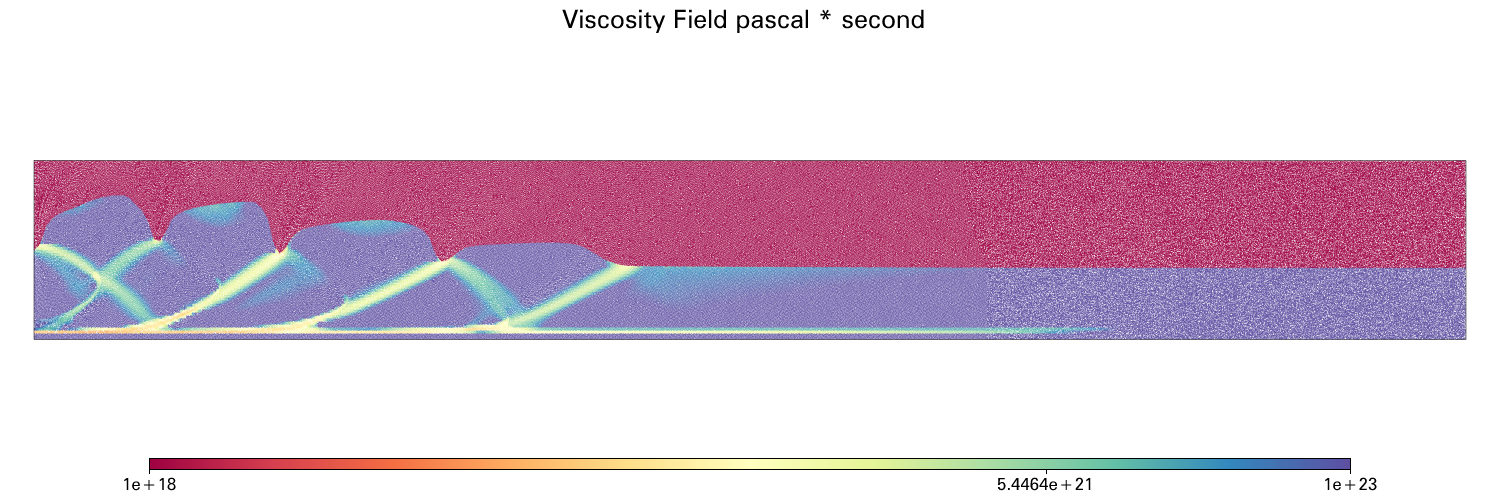

'Viscoity_4Ma.png'

In [17]:
Model.plot.viscosity(figsize=(1500, 500),colours='spectral').save('Viscoity_4Ma.png')


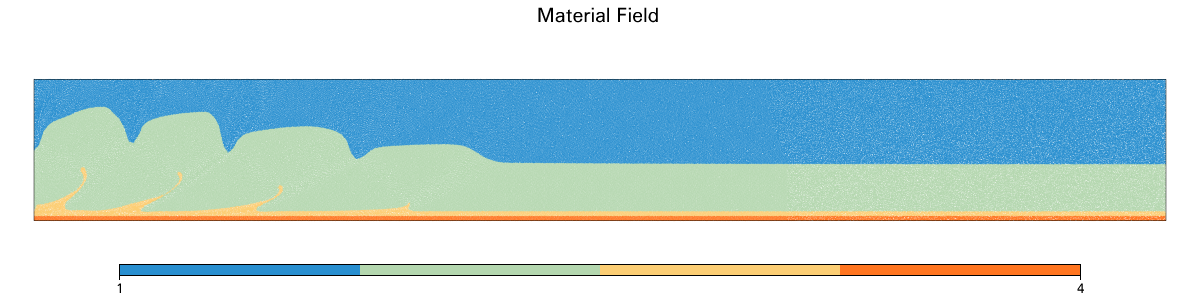

'Material_4Ma.png'

In [18]:
Model.plot.material(figsize=(1200, 300)).save('Material_4Ma.png')


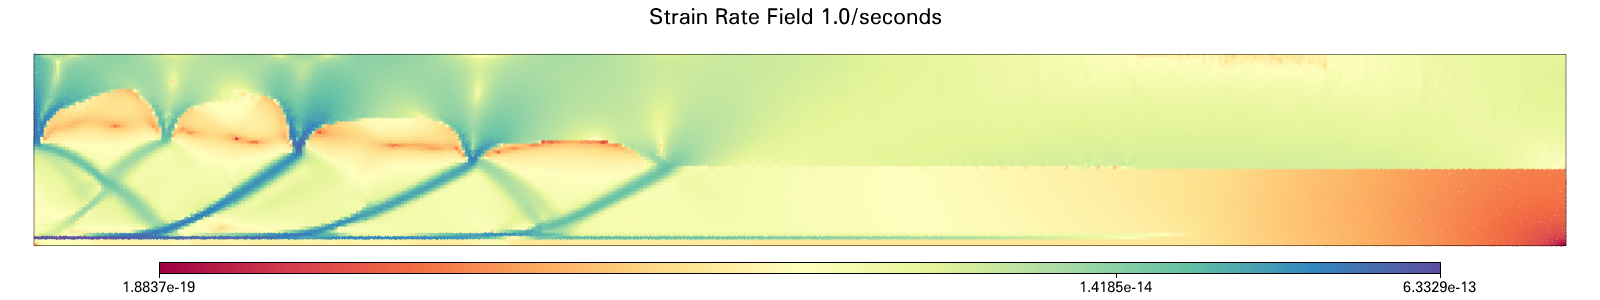

'StrainRate_4Ma.png'

In [19]:
import glucifer
FigSr = glucifer.Figure(figsize=(1600,300),quality=3,title="Strain Rate Field 1.0/seconds")
fact=GEO.Dimensionalize(1.0, 1./u.seconds).magnitude
FigSr.Points(Model.swarm,Model.strainRateField* fact,logScale=True,colours='spectral',fn_size=2)
FigSr.show()
FigSr.save("StrainRate_4Ma")